In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15 # runtime configuraion parameters
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'

In [14]:
data=pd.read_csv('WHR_21.csv')
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
#data.columns

In [12]:
data_columns=['Country name','Regional indicator','Ladder score','Logged GDP per capita',
             'Social support','Healthy life expectancy','Freedom to make life choices',
             'Generosity','Perceptions of corruption']

In [15]:
data.shape

(149, 20)

In [56]:
# data=data[data_columns].copy()

In [68]:
'''happy_df=data.rename({'Country name':'country_name','Regional indicator':'regional_indicator',
                      'Ladder score':'ladder_score',
                      'Logged GDP per capita':'logged_GDP per capita',
                      'Social support':'social support',
                      'Healthy life expectancy':'healthy life expectancy',
                      'Freedom to make life choices':'freedom to make life choices',
                      'Generosity':'generosity',
                      'Perceptions of corruption':'perceptions of corruption'})
'''

In [9]:
data.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

No handles with labels found to put in legend.


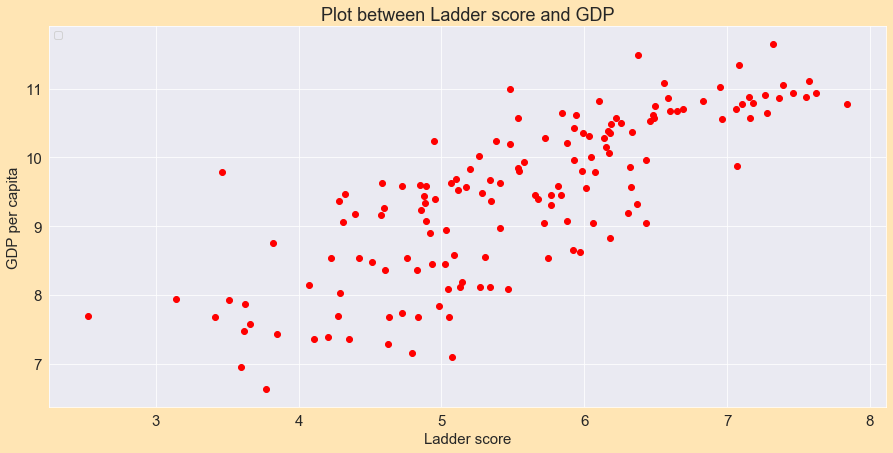

In [22]:
# plot between Happiness and GDP
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Ladder score and GDP')
plt.scatter(x=data['Ladder score'],y=data['Logged GDP per capita'],color='red')
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Ladder score')
plt.ylabel('GDP per capita')
plt.show()

In [23]:
gdp_region=data.groupby('Regional indicator')['Logged GDP per capita'].sum()
gdp_region

Regional indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: Logged GDP per capita, dtype: float64

Text(0, 0.5, ' ')

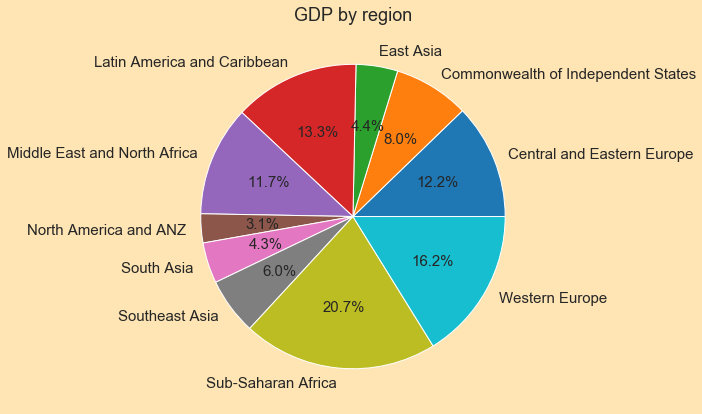

In [25]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by region')
plt.ylabel(' ')

In [28]:
# total countries
total_countries=data.groupby('Regional indicator')[['Country name']].count()
total_countries

,Country name
Regional indicator,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


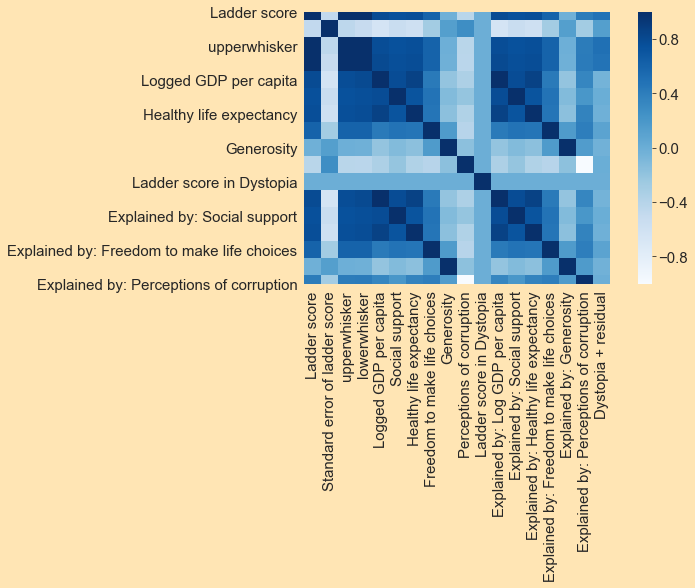

In [29]:
# co_relation map
cor=data.corr(method='pearson')
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor, dtype=np.bool),
           cmap='Blues',square=True,ax=ax)

In [36]:
# corruption in regions
corruption = data.groupby('Regional indicator')[['Perceptions of corruption']].mean()
corruption

,Perceptions of corruption
Regional indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944
